In [1]:
from ast import literal_eval

import pandas as pd
import matplotlib.pyplot as plt

In [2]:
plt.style.use("dark_background")
plt.rcParams["font.family"] = "jetbrains mono"
plt.rcParams["figure.dpi"] = 150

In [3]:
srp = pd.read_csv("data/srp.csv")
print(srp.shape)
srp.head()

(3385, 55)


,SPID,PROP_ID,PREFERENCE,DESCRIPTION,PROPERTY_TYPE,CITY,TRANSACT_TYPE,OWNTYPE,BEDROOM_NUM,PRICE_PER_UNIT_AREA,...,REGISTERED_DAYS,PRIMARY_TAGS,SECONDARY_TAGS,TOTAL_LANDMARK_COUNT,FORMATTED_LANDMARK_DETAILS,SOCIETY_NAME,BUILDING_NAME,location,BALCONY_NUM,FLOOR_NUM
0,69961448,Z69961448,S,Its park pool facing flat with all interior do...,Residential Apartment,Gurgaon,1.0,1,4.0,7435.0,...,2 weeks ago,['FEATURED'],"['READY TO MOVE', 'RESALE', 'RERA']",10.0,"[{'text': '1 Shopping'}, {'text': '2 Connectiv...",Emaar MGF Palm Hills,Emaar MGF Palm Hills,"{'CITY': '8', 'CITY_NAME': 'Gurgaon', 'BUILDIN...",4.0,4
1,62141426,Y62141426,S,Brand new ultra luxury builder floor of 360 sq...,Independent/Builder Floor,Gurgaon,1.0,1,4.0,10493.0,...,6 days ago,['FEATURED'],"['UNDER CONSTRUCTION', 'RESALE']",47.0,"[{'text': '3 Metro Stations'}, {'text': '2 Rel...",Brand New Builder Floor,Brand New Builder Floor,"{'CITY': '8', 'CITY_NAME': 'Gurgaon', 'BUILDIN...",2.0,2
2,69248094,P69248094,S,Brand new 502 yards floor available in dlf pha...,Independent/Builder Floor,Gurgaon,1.0,1,4.0,12061.0,...,1 month ago,[],"['READY TO MOVE', 'RESALE']",47.0,"[{'text': '6 Metro Stations'}, {'text': '1 Rel...",NaN,NaN,"{'CITY': '8', 'CITY_NAME': 'Gurgaon', 'BUILDIN...",3.0,3
3,69293622,M69293622,S,Park facing 4bhk sq with ultra luxury modern a...,Independent/Builder Floor,Gurgaon,1.0,1,4.0,13076.0,...,1 month ago,[],"['READY TO MOVE', 'RESALE']",44.0,"[{'text': '6 Metro Stations'}, {'text': '1 Rel...",Park Facing,Park Facing,"{'CITY': '8', 'CITY_NAME': 'Gurgaon', 'BUILDIN...",4.0,2
4,69248544,P69248544,S,Brand new 402 yards floor available in dlf pha...,Independent/Builder Floor,Gurgaon,1.0,1,4.0,13520.0,...,1 month ago,[],"['READY TO MOVE', 'RESALE']",47.0,"[{'text': '6 Metro Stations'}, {'text': '2 Rel...",NaN,NaN,"{'CITY': '8', 'CITY_NAME': 'Gurgaon', 'BUILDIN...",3.0,2


In [4]:
srp.columns

Index(['SPID', 'PROP_ID', 'PREFERENCE', 'DESCRIPTION', 'PROPERTY_TYPE', 'CITY',
       'TRANSACT_TYPE', 'OWNTYPE', 'BEDROOM_NUM', 'PRICE_PER_UNIT_AREA',
       'FURNISH', 'FACING', 'AGE', 'TOTAL_FLOOR', 'FEATURES', 'REGISTER_DATE',
       'POSTING_DATE', 'UPDATE_DATE', 'CLASS', 'RES_COM', 'PROP_NAME',
       'PROPERTY_NUMBER', 'MIN_PRICE', 'MAX_PRICE', 'PRICE_SQFT', 'PROJ_ID',
       'BUILDING_ID', 'VERIFIED', 'MAP_DETAILS', 'MIN_AREA_SQFT',
       'MAX_AREA_SQFT', 'AMENITIES', 'ALT_TAG', 'PRODUCT_TYPE', 'TOP_USPS',
       'EXPIRY_DATE', 'PROPERTY_TYPE__U', 'AREA', 'SECONDARY_AREA', 'PRICE',
       'PROP_HEADING', 'VALUE_LABEL', 'CLASS_HEADING', 'CLASS_LABEL',
       'REGISTER_DATE__U', 'REGISTERED_DAYS', 'PRIMARY_TAGS', 'SECONDARY_TAGS',
       'TOTAL_LANDMARK_COUNT', 'FORMATTED_LANDMARK_DETAILS', 'SOCIETY_NAME',
       'BUILDING_NAME', 'location', 'BALCONY_NUM', 'FLOOR_NUM'],
      dtype='object')

In [5]:
regular_cols = [
    "SPID",
    "PROP_ID",
]

extra_cols = [
    "SECONDARY_TAGS",
    "TOTAL_LANDMARK_COUNT",
    "FORMATTED_LANDMARK_DETAILS",
    "MAP_DETAILS",
    "PROP_HEADING",
    "DESCRIPTION",
    "PROPERTY_TYPE",
    "location",
    "FURNISH",
    "FACING",
    "AGE",
    "TOTAL_FLOOR",
    "FEATURES",
]

price_and_area_cols = [
    "AREA",
    "PRICE",
    "PRICE_PER_UNIT_AREA",
    "PRICE_SQFT",
    "MAX_PRICE",
    "MAX_AREA_SQFT",
]

rejected_cols = [
    "MIN_PRICE",
    "MIN_AREA_SQFT",
    "SECONDARY_AREA",
]

missing_cols = [
    "BEDROOM_NUM",  # need to extract the BHK detials
    # 'BATHROOM_NUM',  # not available
    "AMENITIES",
    "PROP_NAME",
    "BALCONY_NUM",
    "FLOOR_NUM",
]

len(regular_cols), len(extra_cols), len(price_and_area_cols), len(missing_cols)

(2, 13, 6, 5)

In [6]:
all_cols = (
    regular_cols + extra_cols + price_and_area_cols + rejected_cols + missing_cols
)
len(all_cols)

29

In [7]:
df = srp[all_cols].copy()
df.shape

(3385, 29)

In [8]:
num_cols = df.select_dtypes(["float", "int"]).columns
cat_cols = df.select_dtypes("object").columns

len(cat_cols), len(num_cols)

(15, 14)

<Axes: ylabel='Missing values (in %)'>

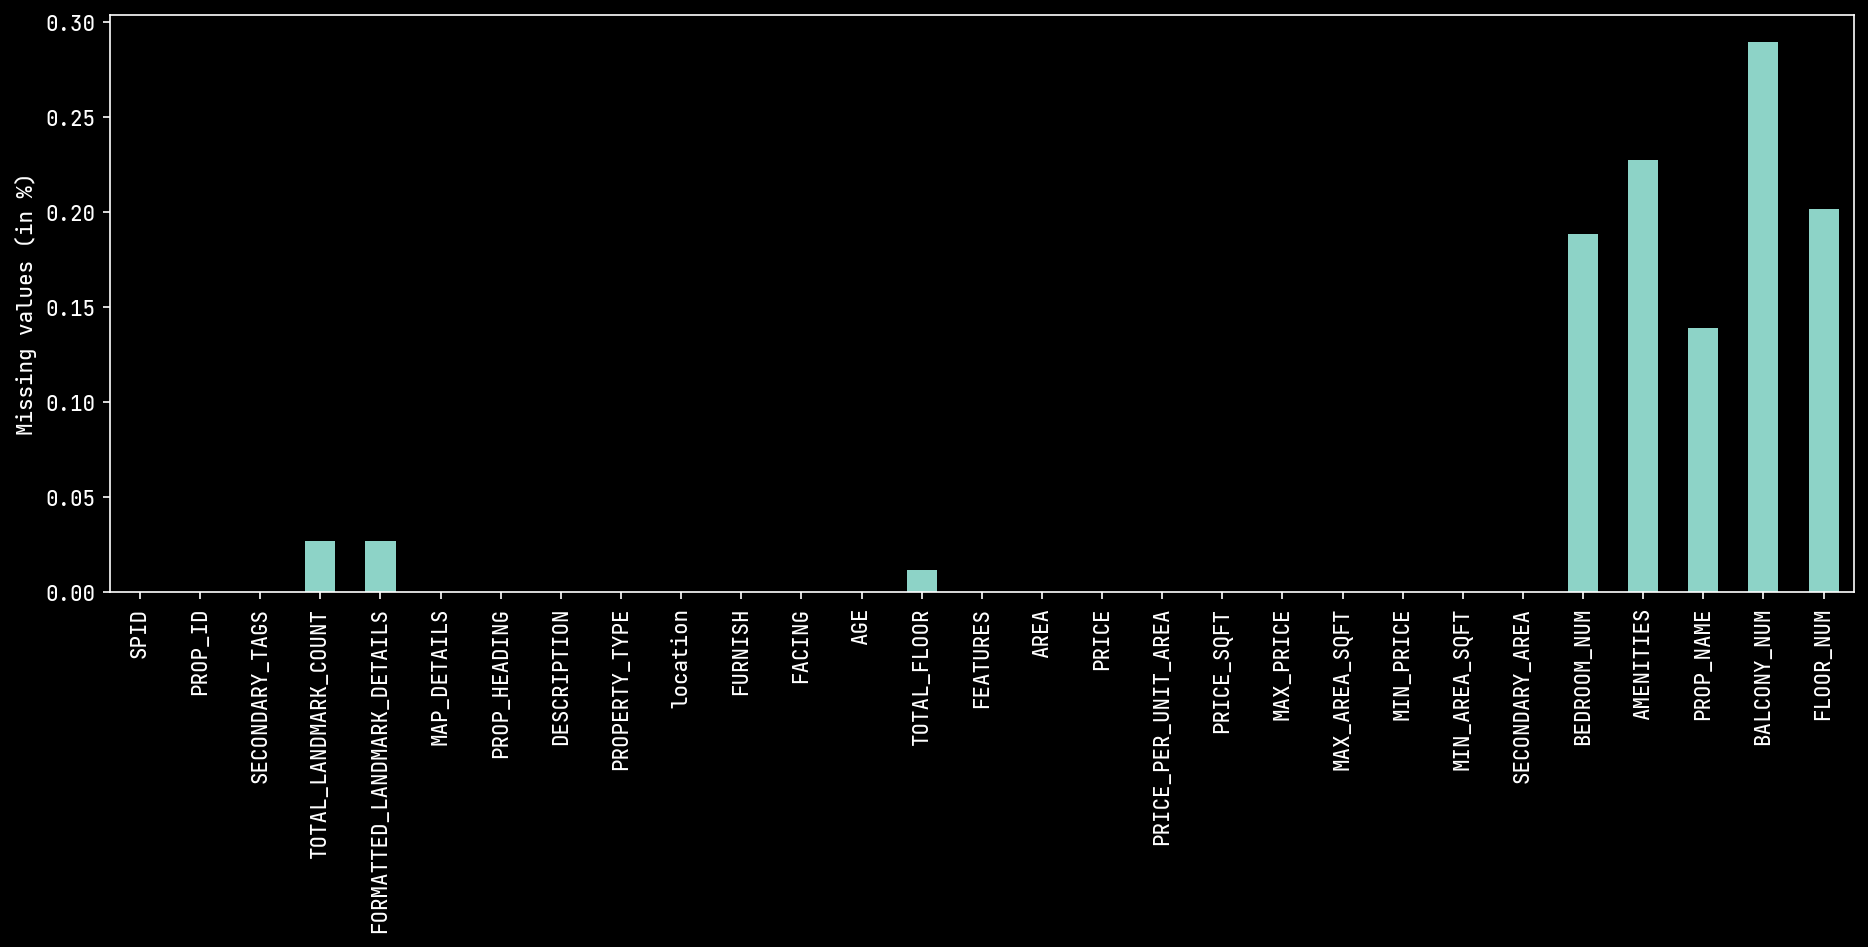

In [9]:
(
    df.isnull()
    .sum()
    .div(df.shape[0])
    .plot(kind="bar", figsize=(15, 5), ylabel="Missing values (in %)")
)

## Price and Area

In [10]:
price_cols = ["PRICE", "PRICE_PER_UNIT_AREA", "PRICE_SQFT", "MAX_PRICE"]
area_cols = ["AREA", "MAX_AREA_SQFT", "AREA_SQFT"]

price_cols, area_cols

(['PRICE', 'PRICE_PER_UNIT_AREA', 'PRICE_SQFT', 'MAX_PRICE'],
 ['AREA', 'MAX_AREA_SQFT', 'AREA_SQFT'])

In [11]:
df[
    (df["MIN_PRICE"].sub(df["MAX_PRICE"]) > 0)
    | (df["MIN_AREA_SQFT"].sub(df["MAX_AREA_SQFT"]) > 0)
]

,SPID,PROP_ID,SECONDARY_TAGS,TOTAL_LANDMARK_COUNT,FORMATTED_LANDMARK_DETAILS,MAP_DETAILS,PROP_HEADING,DESCRIPTION,PROPERTY_TYPE,location,...,MAX_PRICE,MAX_AREA_SQFT,MIN_PRICE,MIN_AREA_SQFT,SECONDARY_AREA,BEDROOM_NUM,AMENITIES,PROP_NAME,BALCONY_NUM,FLOOR_NUM


If `('MAX_*' - 'MIN_*' == 0)` this means both features contains same values. You can use anyone of them.

In [12]:
df[~df["AREA"].str.contains("sq.ft.")]

,SPID,PROP_ID,SECONDARY_TAGS,TOTAL_LANDMARK_COUNT,FORMATTED_LANDMARK_DETAILS,MAP_DETAILS,PROP_HEADING,DESCRIPTION,PROPERTY_TYPE,location,...,MAX_PRICE,MAX_AREA_SQFT,MIN_PRICE,MIN_AREA_SQFT,SECONDARY_AREA,BEDROOM_NUM,AMENITIES,PROP_NAME,BALCONY_NUM,FLOOR_NUM


In [13]:
df[~df["SECONDARY_AREA"].str.contains("sq.m.")]

,SPID,PROP_ID,SECONDARY_TAGS,TOTAL_LANDMARK_COUNT,FORMATTED_LANDMARK_DETAILS,MAP_DETAILS,PROP_HEADING,DESCRIPTION,PROPERTY_TYPE,location,...,MAX_PRICE,MAX_AREA_SQFT,MIN_PRICE,MIN_AREA_SQFT,SECONDARY_AREA,BEDROOM_NUM,AMENITIES,PROP_NAME,BALCONY_NUM,FLOOR_NUM


In [14]:
df[["AREA", "SECONDARY_AREA"]].sample(7)

,AREA,SECONDARY_AREA
1296,598 sq.ft.,55.56 sq.m.
656,1935 sq.ft.,179.77 sq.m.
2920,1628 sq.ft.,151.25 sq.m.
794,1672 sq.ft.,155.33 sq.m.
3207,1245 sq.ft.,115.66 sq.m.
1945,2600 sq.ft.,241.55 sq.m.
2907,2120 sq.ft.,196.95 sq.m.


In [15]:
df[["PRICE", "MIN_PRICE"]].sample(7)

,PRICE,MIN_PRICE
1376,40 L,4000000
1317,1.17 Cr,11700000
2897,1.5 Cr,15000000
1650,3.1 Cr,31000000
2524,1.84 Cr,18392000
2134,66 L,6600000
3181,1.68 Cr,16800000


Here, `MIN_PRICE` is integer value of `PRICE` column which is in string value.

In [16]:
df[["AREA", "MIN_AREA_SQFT"]].sample(7)

,AREA,MIN_AREA_SQFT
2123,1423 sq.ft.,132.200969
395,900 sq.ft.,83.612700
1074,2813 sq.ft.,261.336139
880,1620 sq.ft.,150.502860
2407,2200 sq.ft.,204.386600
1968,1383-1572 sq.ft.,128.484849
1179,716 sq.ft.,66.518548


In [17]:
df[["PRICE", "PRICE_SQFT", "PRICE_PER_UNIT_AREA", "AREA", "MAX_AREA_SQFT"]].sample(7)

,PRICE,PRICE_SQFT,PRICE_PER_UNIT_AREA,AREA,MAX_AREA_SQFT
1764,1.27 - 1.51 Cr,13199.0,13199.0,959-1145 sq.ft.,106.373935
675,2.2 Cr,9490.0,9490.0,2318 sq.ft.,215.349154
1641,1.18 Cr,6490.0,6490.0,1818 sq.ft.,168.897654
2247,1.8 Cr,8571.0,8571.0,2100 sq.ft.,195.096300
2513,1.06 Cr,5102.0,5102.0,2077 sq.ft.,192.959531
2173,1.33 Cr,13274.0,13274.0,1000 sq.ft.,92.903000
100,2.65 Cr,87748.0,87748.0,302 sq.ft.,28.056706


## Extra

In [18]:
df[["TOTAL_LANDMARK_COUNT", "FORMATTED_LANDMARK_DETAILS"]].sample(7)

,TOTAL_LANDMARK_COUNT,FORMATTED_LANDMARK_DETAILS
2651,10.0,"[{'text': '1 Shopping'}, {'text': '2 Connectiv..."
1547,12.0,"[{'text': '1 Metro Station'}, {'text': '2 Conn..."
1563,10.0,"[{'text': '1 Metro Station'}, {'text': '1 Shop..."
1647,15.0,"[{'text': '2 Shoppings'}, {'text': '5 Educatio..."
524,49.0,"[{'text': '1 Religious Place'}, {'text': '1 AT..."
2276,6.0,"[{'text': '1 Hospital'}, {'text': '3 Miscellan..."
2975,9.0,"[{'text': '1 Shopping'}, {'text': '3 Connectiv..."


In [19]:
df["SECONDARY_TAGS"].apply(literal_eval).explode().unique()

array(['READY TO MOVE', 'RESALE', 'RERA', 'UNDER CONSTRUCTION',
       'EAST FACING', 'HUDA APPROVED', 'IN GATED COMMUNITY',
       'CORNER PROPERTY', 'NORTH FACING', 'NORTH-EAST FACING',
       'NEW BOOKING', 'AUTHORITY APPROVED', 'HHB APPROVED',
       'HSIIDC APPROVED', 'NEW LAUNCH'], dtype=object)

In [20]:
df["MAP_DETAILS"].sample(7).apply(literal_eval).tolist()

[{'LATITUDE': '28.406061', 'LONGITUDE': '76.91730890552'},
 {'LATITUDE': '28.394232', 'LONGITUDE': '76.959186'},
 {'LATITUDE': '28.3732763', 'LONGITUDE': '76.9729472'},
 {'LATITUDE': '28.446282', 'LONGITUDE': '76.954775'},
 {'LATITUDE': '28.40845', 'LONGITUDE': '76.931977'},
 {'LATITUDE': '28.425856', 'LONGITUDE': '77.0603'},
 {'LATITUDE': '28.443962', 'LONGITUDE': '76.954155'}]

In [21]:
df["AMENITIES"].sample(7).str.split(",").str.len()

2998     4.0
1646    27.0
437     20.0
469      4.0
1414    10.0
1424     NaN
311      NaN
Name: AMENITIES, dtype: float64

In [22]:
df["AGE"].value_counts()

AGE
1    1150
6     703
5     642
0     639
2     192
3      59
Name: count, dtype: int64

### FACING

| id  | label      |
| --- | ---------- |
| 1   | North      |
| 2   | South      |
| 3   | East       |
| 4   | West       |
| 5   | North-East |
| 6   | North-West |
| 7   | South-East |
| 8   | South-West |

**Maybe `0` means `NaN`.**

In [23]:
df["FACING"].value_counts()

FACING
0    1076
3     629
5     604
1     328
4     172
2     163
7     152
6     132
8     129
Name: count, dtype: int64

In [24]:
df["location"].sample(3).apply(literal_eval).tolist()

[{'CITY': '8',
  'CITY_NAME': 'Gurgaon',
  'BUILDING_ID': '0',
  'BUILDING_NAME': '',
  'SOCIETY_NAME': '',
  'LOCALITY_ID': '7870',
  'LOCALITY_NAME': 'Sector 81 Gurgaon',
  'ADDRESS': 'Sector 81'},
 {'CITY': '8',
  'CITY_NAME': 'Gurgaon',
  'BUILDING_ID': '11892',
  'BUILDING_NAME': 'Bestech Park View Ananda',
  'SOCIETY_NAME': 'Bestech Park View Ananda',
  'LOCALITY_ID': '7870',
  'LOCALITY_NAME': 'Sector 81 Gurgaon',
  'ADDRESS': None},
 {'CITY': '8',
  'CITY_NAME': 'Gurgaon',
  'BUILDING_ID': '1000501',
  'BUILDING_NAME': 'Emaar Digihomes',
  'SOCIETY_NAME': 'Emaar Digihomes',
  'LOCALITY_ID': '7506',
  'LOCALITY_NAME': 'Sector 62 Gurgaon',
  'ADDRESS': None}]

In [25]:
df["SOCIETY_NAME"] = df["location"].apply(literal_eval).str.get("SOCIETY_NAME")
df["LOCALITY_NAME"] = df["location"].apply(literal_eval).str.get("LOCALITY_NAME")
df["CITY_NAME"] = df["location"].apply(literal_eval).str.get("CITY_NAME")

In [26]:
df["PROP_HEADING"].sample(7)

1585                      3 BHK Flat in Sector 79 Gurgaon
129         Residential land / Plot in Sector 108 Gurgaon
135                       4 BHK Flat in Sector 86 Gurgaon
257     3 BHK Independent Builder Floor in Sector 27 G...
954                       3 BHK Flat in Sector 89 Gurgaon
1036                      3 BHK Flat in Sector 92 Gurgaon
306          Residential land / Plot in Sector 91 Gurgaon
Name: PROP_HEADING, dtype: object

In [27]:
df["DESCRIPTION"].sample(7)

2812    This 4 bhk flat is available for sale in dlf n...
2840    Available for sale facing apartment key in han...
2907    This is best property in this area as location...
1761    M3M Crown is an under construction project, of...
1636    Looking for a 3 bhk property for sale in gurga...
3269    Vatika 1000 sq yds plot registry case availabl...
783     Ready to move in property with wardrobes, fans...
Name: DESCRIPTION, dtype: object

In [28]:
df["PROPERTY_TYPE"].value_counts()

PROPERTY_TYPE
Residential Apartment        1996
Independent/Builder Floor     698
Residential Land              638
Independent House/Villa        41
Serviced Apartments             8
Farm House                      2
Studio Apartment                2
Name: count, dtype: int64

In [29]:
df["PROP_NAME"].sample(7)

1139                      NaN
920                       NaN
2983           JMS The Nation
1594    Pyramid Urban Homes 2
2132                      NaN
3218               Sare Homes
2516           Bestech Altura
Name: PROP_NAME, dtype: object

In [30]:
df["BALCONY_NUM"].value_counts()

BALCONY_NUM
3.0    729
2.0    725
4.0    678
1.0    181
0.0     92
Name: count, dtype: int64

In [31]:
df["FLOOR_NUM"].value_counts()[:10]

FLOOR_NUM
1     592
2     303
3     223
4     215
6     134
8     132
5     121
10    112
7     112
9     108
Name: count, dtype: int64

In [32]:
df["BEDROOM_NUM"].value_counts()

BEDROOM_NUM
3.0     1370
4.0      679
2.0      621
1.0       39
5.0       36
9.0        1
12.0       1
Name: count, dtype: int64

In [33]:
df["TOTAL_FLOOR"].value_counts().iloc[:10]

TOTAL_FLOOR
4.0     1178
14.0     207
20.0     196
3.0      166
19.0     160
15.0     108
29.0     106
26.0     103
13.0     102
12.0      96
Name: count, dtype: int64